In [1]:
import csv
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
def test_data():
    return pd.read_csv('../data/csv/test.csv').dropna()

def macron_data():
    return pd.read_csv('../data/csv/prediction_macron.csv').dropna()

def lepen_data():
    return pd.read_csv('../data/csv/prediction_lepen.csv').dropna()

In [3]:
train = pd.read_csv('../data/csv/training.csv').dropna()

In [4]:
def logistic_sentiment(df):
    pipeline = Pipeline(
        [('vect', CountVectorizer(token_pattern=r'[^\s]+')),
         ('tfidf', TfidfTransformer()),
         ('clf', LogisticRegression(
             solver='newton-cg',
             multi_class='multinomial',
             random_state=42,
             max_iter=100,)
         )
        ]
    )
    learner = pipeline.fit(train['text'], train['label'])
    df['pred'] = learner.predict(df['text'])
    return df


def bayes_sentiment(df):
    pipeline = Pipeline(
        [('vect', CountVectorizer(token_pattern=r'[^\s]+')),
         ('tfidf', TfidfTransformer()),
         ('clf', MultinomialNB()
         )
        ]
    )
    learner = pipeline.fit(train['text'], train['label'])
    df['pred'] = learner.predict(df['text'])
    return df


def svm_sentiment(df):
    pipeline = Pipeline(
        [('vect', CountVectorizer(token_pattern=r'[^\s]+')),
         ('tfidf', TfidfTransformer()),
         ('clf', SGDClassifier(
             loss='hinge',
             penalty='l2',
             alpha=1e-3,
             random_state=42,
             learning_rate='optimal',
             tol=None,
         )
         )
        ]
    )
    learner = pipeline.fit(train['text'], train['label'])
    df['pred'] = learner.predict(df['text'])
    return df

## Test the models on the test dataset

In [5]:
from helper import accuracy, plot_confusion_matrix

In [6]:
logistic = logistic_sentiment(test_data())

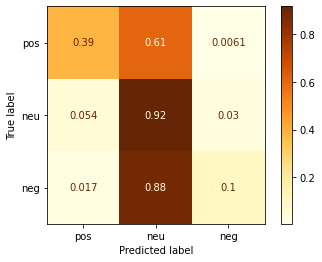

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(logistic['label'], logistic['pred'], labels=['pos', 'neu', 'neg'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['pos', 'neu', 'neg'])
disp.plot(cmap=plt.cm.YlOrBr)

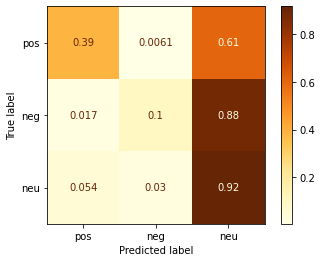

In [23]:
cm = confusion_matrix(logistic['label'], logistic['pred'], labels=['pos', 'neg', 'neu'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['pos', 'neg', 'neu'])
disp.plot(cmap=plt.cm.YlOrBr)

Accuracy: 64.684
Macro F1-score: 47.409


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Predicted label', ylabel='True label'>)

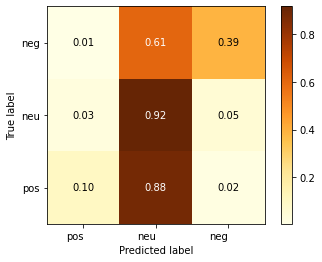

In [18]:
accuracy(logistic)

In [8]:
svm = svm_sentiment(test_data())

Accuracy: 63.207
Macro F1-score: 36.747


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Predicted label', ylabel='True label'>)

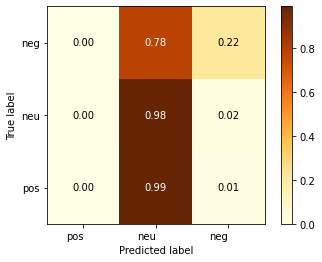

In [9]:
accuracy(svm)

In [10]:
nb = bayes_sentiment(test_data())

Accuracy: 61.519
Macro F1-score: 31.412


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Predicted label', ylabel='True label'>)

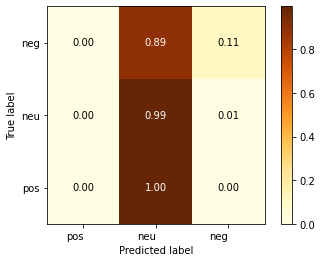

In [12]:
accuracy(nb)

In [ ]:
nb